### PCA on Iris Dataset

In this section we will decompose with PCA a very simple 4-dimensional data set. This is one of the best known pattern recognition datasets. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter (ostatnie) are NOT linearly separable from each other.

In [70]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.datasets import load_iris

%matplotlib inline

In [71]:
data = load_iris(as_frame=True)
df_iris = data.frame
 
df_iris.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In the case (w tym przypadku) that the dimensionality of the data allows it, it is good practice to see how each pair of features correlate with each other. In the following link you will find more methods for visualizing multidimensional data using matplotlib and seaborn libraries: https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57 

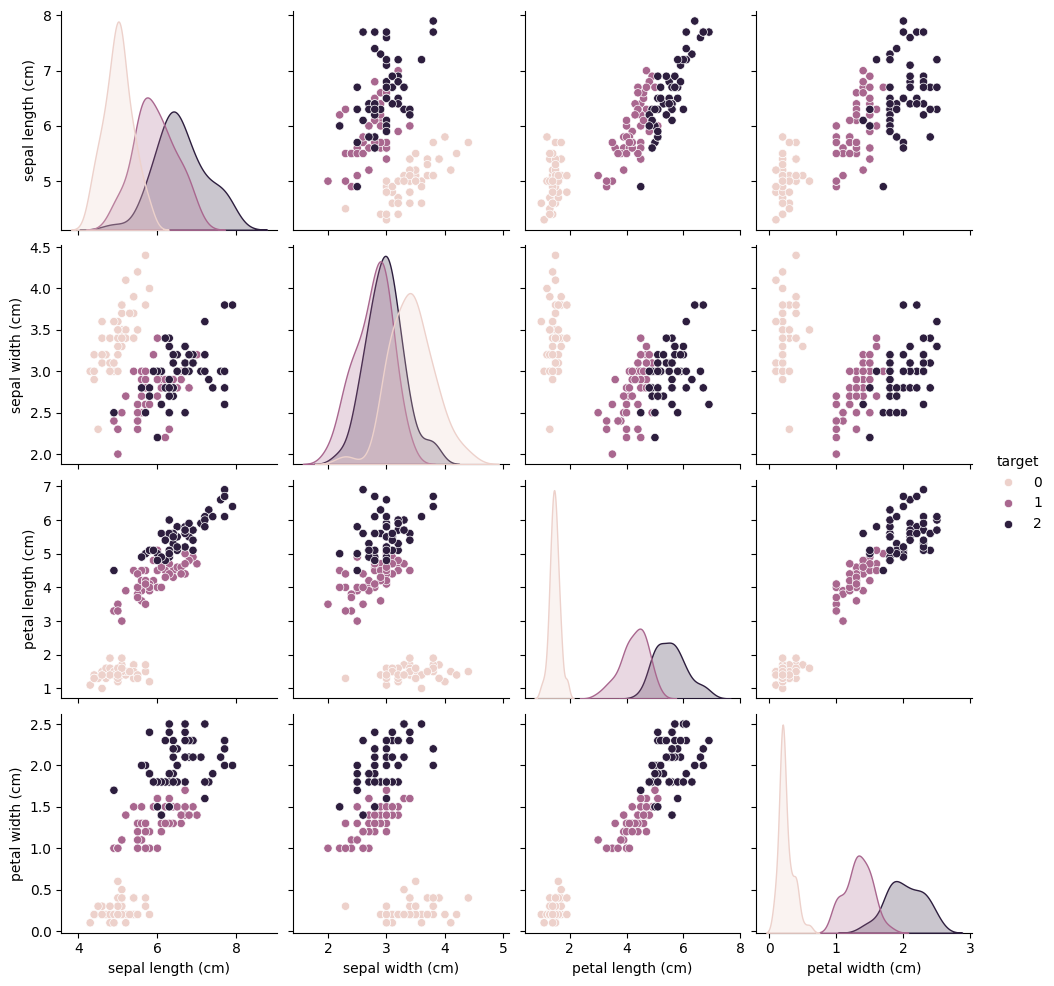

In [72]:
sns.pairplot(df_iris, hue='target')

You can immediately see that the features petal length and petal width are strongly correlated.

In [73]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

## Standardize the Data

Since (ponieważ) PCA yields (wyznacza) a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

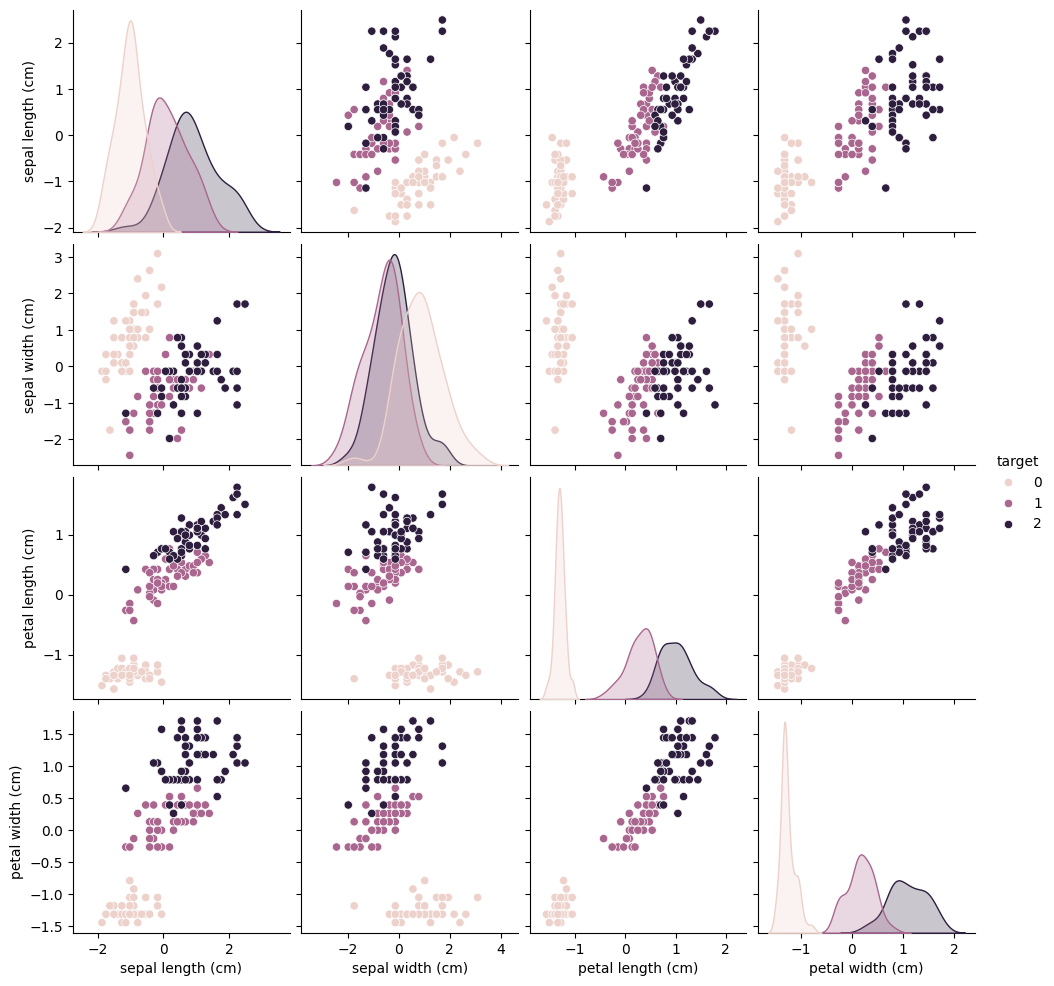

In [74]:
features_iris = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x_iris = df_iris.loc[:, features_iris].values
 
y_iris = df_iris.loc[:,['target']].values
 
x_iris = StandardScaler().fit_transform(x_iris)
 
df_iris_standarize = pd.DataFrame(data = x_iris, columns = features_iris)
df_iris_standarize['target'] = df_iris['target']
df_iris_standarize.head(15)
 
sns.pairplot(df_iris_standarize, hue='target')

We can see that the distributions are now standardized.

## PCA Projection to 2D

In [75]:
pca_iris = PCA(n_components=2)
 
principalComponents_iris = pca_iris.fit_transform(x_iris)
 
principalDf_iris = pd.DataFrame(data = principalComponents_iris, columns = ['principal component 1', 'principal component 2'])
 
finalDf_iris = pd.concat([principalDf_iris, df_iris[['target']]], axis = 1)
finalDf_iris.head(15)

,principal component 1,principal component 2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
5,-2.075631,1.489178,0
6,-2.444029,0.047644,0
7,-2.232847,0.223148,0
8,-2.334640,-1.115328,0
9,-2.184328,-0.469014,0


In [76]:
finalDf_iris['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

## Visualize 2D Projection

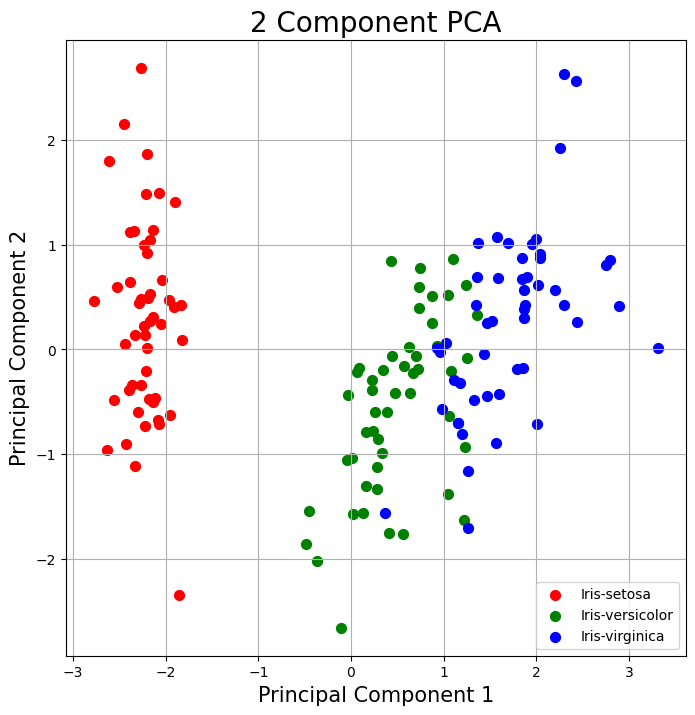

In [77]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

iris_targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color, label in zip(iris_targets, colors,labels):
    indicesToKeep = finalDf_iris['target'] == target
    ax.scatter(finalDf_iris.loc[indicesToKeep, 'principal component 1']
               , finalDf_iris.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
               ,label=label)
ax.legend()
ax.grid()

Iris-setosa is linearly separable from other classes.

## Explained Variance

The explained variance (wariancja wyjaśniona) tells us how much information (variance) can be attributed to each of the principal components.

In [78]:
pca_iris.explained_variance_ratio_

array([0.72962445, 0.22850762])

### PCA

PCA is a linear method. That is it can only be applied to datasets which are linearly separable. It does an excellent job for datasets, which are linearly separable. But, if we use it to non-linear datasets, we might get a result which may not be the optimal dimensionality reduction. Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable. It is similar to the idea of Support Vector Machines.

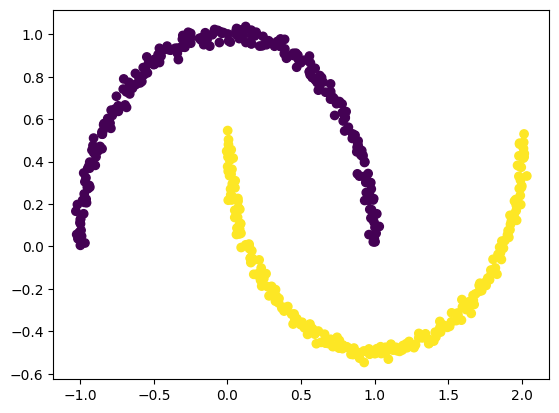

In [79]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
 
X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417)
 
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

Let’s apply PCA on this dataset:

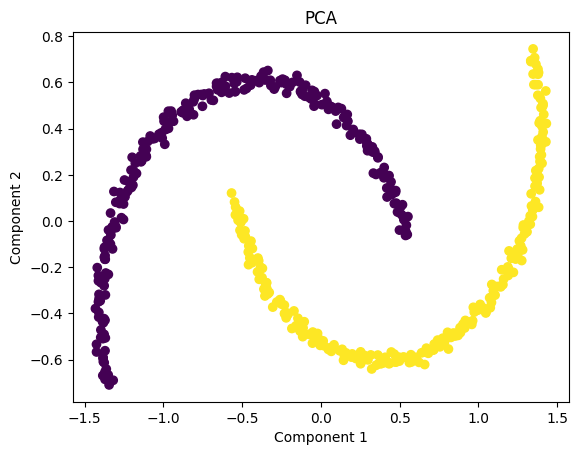

In [80]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
 
plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

PCA failed to distinguish the two classes.

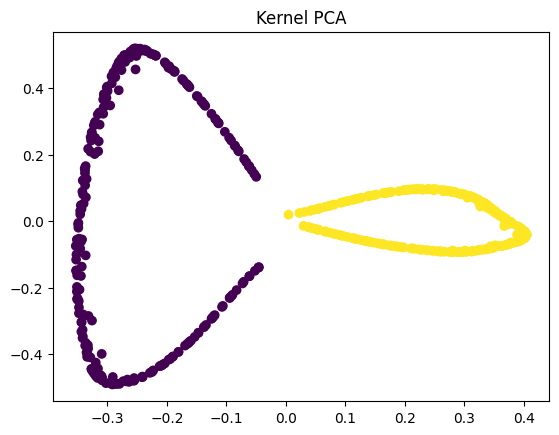

In [81]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel ='rbf', gamma = 15)
X_kpca = kpca.fit_transform(X)
 
plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y)
plt.show()

Applying kernel PCA on this dataset with RBF kernel with a gamma value of 15 allows for a better separation of the classes.

## 1. Perform PCA for Breast Cancer Dataset (3 points)

- You can find this dataset in the scikit-learn library, import it and convert to pandas dataframe. Original labels are ‘0’ and ‘1’; for better readability change these names to: ‘benign’ and ‘malignant’.

- Visualize correlations between pairs of features (due to the greater number of features use pandas `corr()` function instead of `pairplot` and seaborn `heatmap()`).

 

- Examine (zbadaj) explained variance, draw a plot showing relation between total explained variance and number of principal components used.

- Use recursive feature elimination (available in scikit-learn module) or another feature ranking algorithm to split 30 features into 15 “more important” and 15 “less important” features.  
  Then repeat the last step from the full data set – draw a plot showing relation between total explained variance and number of principal components used for all 3 cases.  
  **Explain the result briefly.**


- You can find this dataset in the scikit-learn library, import it and convert to pandas dataframe. Original labels are ‘0’ and ‘1’; for better readability change these names to: ‘benign’ and ‘malignant’.

In [ ]:
from IPython.display import display
pd.set_option('display.max_columns', None)   
pd.set_option('display.width', None)        
pd.set_option('display.max_colwidth', None)  

In [89]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)


df['target'] = data.target
df['target'] = df['target'].map({0: 'malignant', 1: 'benign'})

display(df.head())


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


- Visualize correlations between pairs of features (due to the greater number of features use pandas `corr()` function instead of `pairplot` and seaborn `heatmap()`).

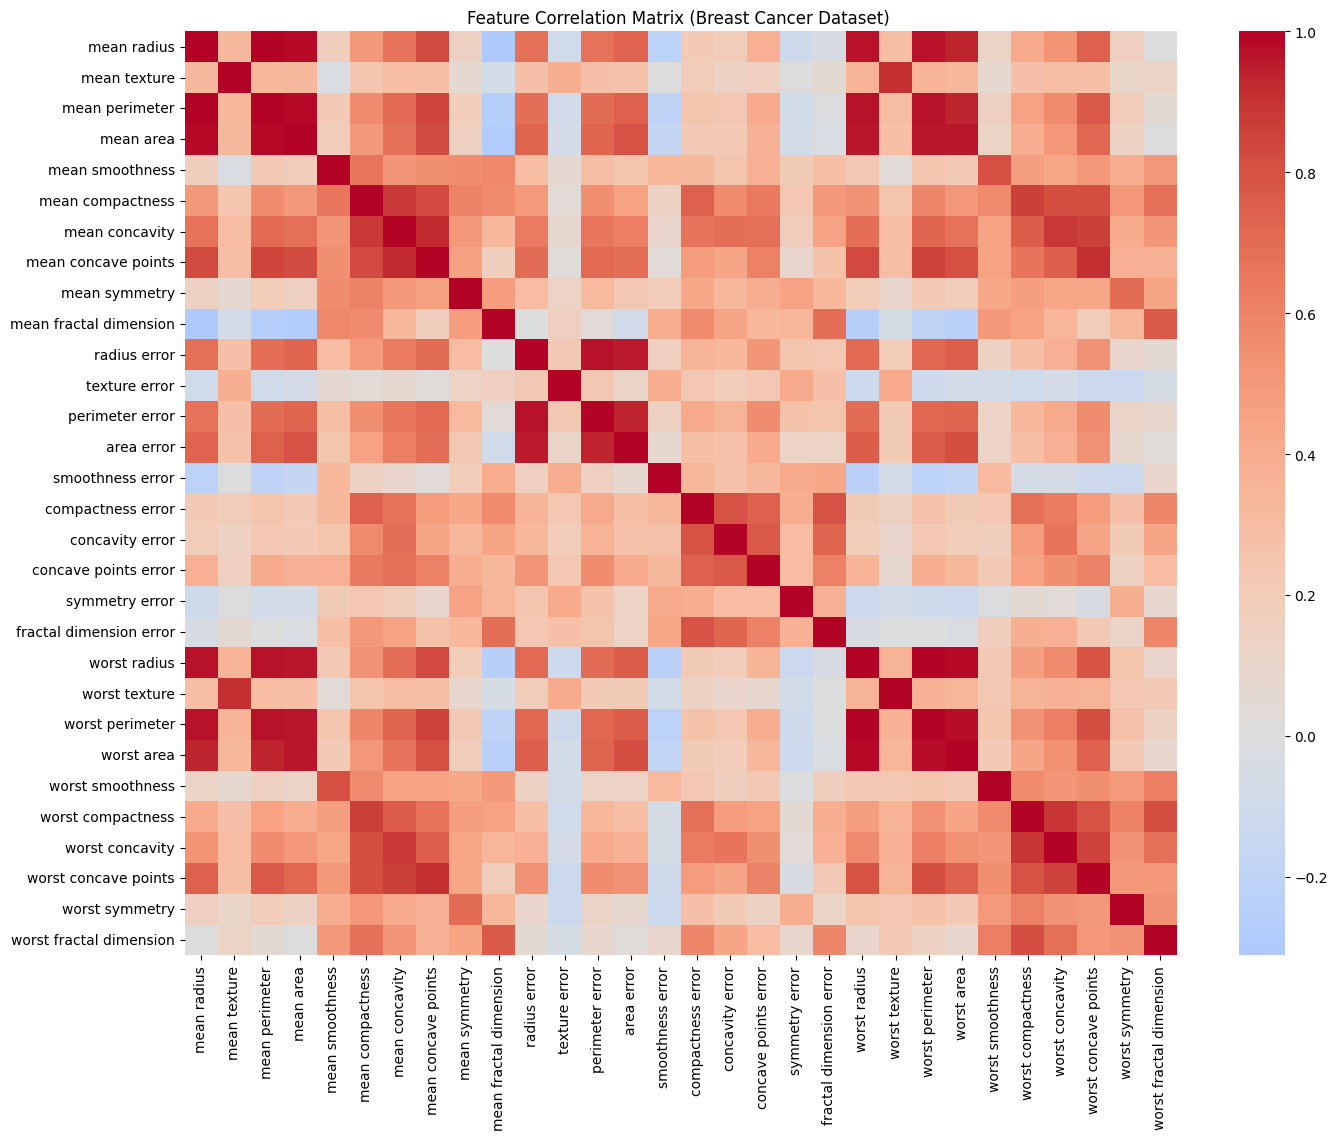

In [91]:
corr_matrix = df.drop(columns='target').corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix (Breast Cancer Dataset) ')
plt.show()

- Examine explained variance, draw a plot showing relation between total explained variance and number of principal components used.

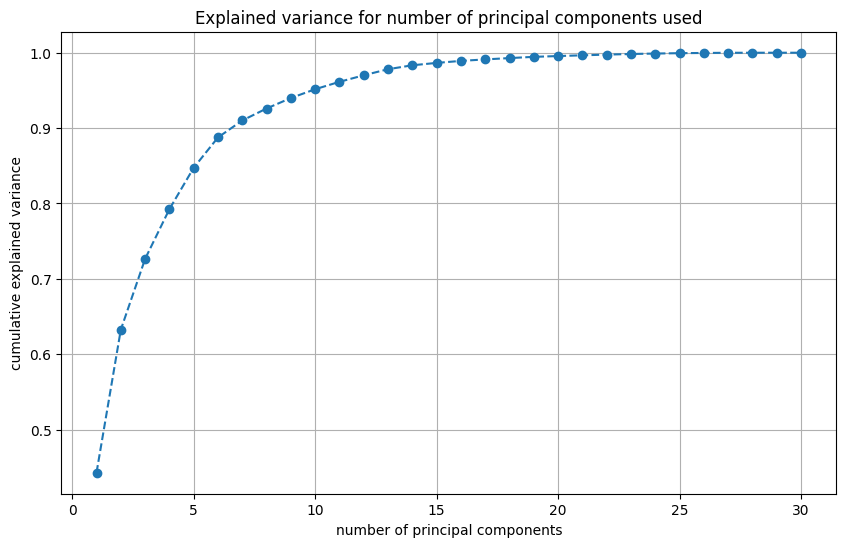

In [93]:
X = data.data

X_scaled = StandardScaler().fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained variance for number of principal components used')
plt.xlabel('number of principal components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.show()

- Use recursive feature elimination (available in scikit-learn module) or another feature ranking algorithm to split 30 features into 15 “more important” and 15 “less important” features.  
  Then repeat the last step from the full data set – draw a plot showing relation between total explained variance and number of principal components used for all 3 cases.  
  **Explain the result briefly.**

In [99]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

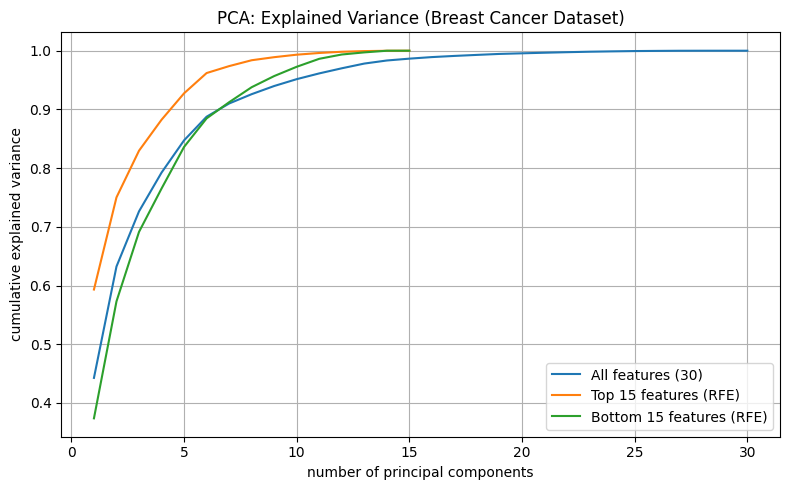

In [100]:
X = data.data
y = data.target

X = StandardScaler().fit_transform(X)

estimator = LogisticRegression(max_iter=1000)
selector = RFE(estimator, n_features_to_select=15)
selector.fit(X, y)

X_all = X
X_top15 = X[:, selector.support_]         
X_bottom15 = X[:, ~selector.support_]      


def explained_variance(X_data):
    pca = PCA().fit(X_data)
    return np.cumsum(pca.explained_variance_ratio_)

var_all = explained_variance(X_all)
var_top15 = explained_variance(X_top15)
var_bottom15 = explained_variance(X_bottom15)


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(var_all) + 1), var_all, label="All features (30)")
plt.plot(range(1, len(var_top15) + 1), var_top15, label="Top 15 features (RFE)")
plt.plot(range(1, len(var_bottom15) + 1), var_bottom15, label="Bottom 15 features (RFE)")

plt.xlabel("number of principal components")
plt.ylabel("cumulative explained variance")
plt.title("PCA: Explained Variance (Breast Cancer Dataset)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2: KernelPCA (3 points)

- Visualize in 2D datasets used in this lab, experiment with the parameters of the KernelPCA method. Change `kernel` and `gamma` params.

**Documentation:** [https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)

### 3: Classic PCA Analysis on MNIST (4 points)

- Download the MNIST data set (there is a function to load this set in libraries such as scikit-learn, keras). It is a collection of black and white photos of handwritten digits with a resolution of 28x28 pixels, which together gives 784 dimensions.
- Try to visualize this dataset using PCA and KernelPCA, don’t expect full separation of the data.
- Similar to the exercises, examine explained variance. Draw explained variance vs number of principal components plot.
- Find number of principal components for 99%, 95%, 90%, and 85% of explained variance.
- Draw some sample MNIST digits and from PCA of its images transform data back to its [original space](#). Make an inverse transformation for number of components corresponding with explained variance shown above and draw the reconstructed images. The idea of this exercise is to see visually how depending on the number of components some information is lost.
- Perform the same [reconstruction](#) using KernelPCA (make comparisons for the same components number).

---

### **Important:**

#### Write a brief analysis (200–500 words) addressing:

1. **What are the key strengths and limitations of the PCA variant you explored?**
2. **In what real-world scenarios would this approach be particularly useful?**
3. **How does the computational complexity scale with dataset size?**
4. **What improvements or modifications would you suggest to the method?**


## (*) Optional: 4. Modern PCA Applications (2 points)

Choose **ONE** of the following advanced tasks:

### Option A: Robust PCA for Noisy Image Reconstruction

1. Take 10 sample images from MNIST  
2. Add random noise and some structured outliers (e.g., salt and pepper noise)  
3. Apply both standard PCA and Robust PCA for denoising  
4. Compare the results quantitatively (using metrics like PSNR, SSIM) and qualitatively  

### Option B: Incremental PCA for Large Datasets

1. Load the Fashion-MNIST dataset (a more complex alternative to MNIST)  
2. Implement a streaming data scenario by processing the dataset in small batches  
3. Apply Incremental PCA and compare its performance (both in terms of computation time and accuracy) with standard PCA  
4. Visualize how the principal components evolve as more data is processed  

### Option C: PCA in Convolutional Autoencoder

1. Implement a simple convolutional autoencoder for MNIST digit reconstruction  
2. Extract the bottleneck layer representations (latent space)  
3. Compare these representations with traditional PCA by:
   - Visualizing the 2D projections of both  
   - Measuring reconstruction quality at comparable compression ratios  
   - Analyzing the feature importance in both approaches  

---

### Important:

**Write a brief analysis (200–500 words) addressing:**

1. **What are the key strengths and limitations of the PCA variant you explored?**

2. **In what real-world scenarios would this approach be particularly useful?**

3. **How does the computational complexity scale with dataset size?**

4. **What improvements or modifications would you suggest to the method?**